In [1]:
# univariate cnn lstm example
from numpy import array

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

import numpy
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from pandas import read_csv
from math import sqrt


# split a univariate sequence into samples

def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def train_test (n_steps_in, n_steps_out, propTrainTest, dataset):
    
    n_steps_in, n_steps_out = n_steps_in, n_steps_out
    # split train test
    X, y = split_sequence(dataset, n_steps_in, n_steps_out)
    
    train_size = int(len(X) * propTrainTest)
    test_size = len(dataset) - train_size
    train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]
    train_Y, test_Y = y[0:train_size,:], y[train_size:len(y),:]
    
    return (train_X, test_X, train_Y, test_Y)

def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculem RMSE per cada dia
    for i in range(actual.shape[1]):
        # calculem MSE
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculem RMSE
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calcul global de RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores
# fixem random seed
numpy.random.seed(7)

dadesSau = read_csv('dadesBaells.csv', sep=';',header=0, index_col=0)
dataframe = pd.DataFrame(dadesSau.loc[dadesSau.index >= '2000-01-01']['Volum'])
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalitzem

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset = [item for sublist in dataset for item in sublist]

n_steps_in = 20
n_steps_out = 15
propTrainTest = 0.8
train_X, test_X, train_Y, test_Y = train_test(n_steps_in, n_steps_out, propTrainTest, dataset)


c:\users\manel\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from scipy.stats import uniform
from scipy.stats import randint
arbres=[]
profunditat=[]
max_features=[]
min_samples_split = []
min_samples_leaf = []
for i in range(500):
    arbres.append((randint.rvs(5, 500)))
    profunditat.append((randint.rvs(1, 121)))
    max_features.append((randint.rvs(1, 20)))
    min_samples_split.append((randint.rvs(2, 50)))
    min_samples_leaf.append((randint.rvs(1, 45)))

In [3]:
resultat=[]

for arbre, profund, max_f, mss, msl in zip(arbres, profunditat, max_features, min_samples_split, min_samples_leaf):
    regr_rf = RandomForestRegressor(n_estimators=arbre, max_depth=profund, max_features=max_f, 
                                    min_samples_split = mss, min_samples_leaf=msl, random_state=2)
    regr_rf.fit(train_X, train_Y)
    testPredict = regr_rf.predict(test_X)
    # invertim prediccions per tenir-les en l'escala original
    testPredict = scaler.inverse_transform(testPredict)
    test_YR = scaler.inverse_transform(test_Y)

    RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)
    print(RMSE_TOT,arbre, profund, max_f, mss, msl)
    resultat.append((arbre, profund, max_f, mss, msl, RMSE_days,RMSE_TOT))

3.234139989196642 180 69 4 21 24
2.997497941231529 108 93 15 25 9
3.0194473434455777 350 111 11 28 9
3.183791540967997 172 103 5 9 1
3.0716421137491707 80 56 7 21 6
3.07295900460824 317 25 17 2 35
3.0211304804091963 317 74 15 40 5
3.1612411279497064 499 10 4 5 9
3.324785638917736 344 49 2 2 17
3.0145054718877944 379 32 13 30 8
3.0663348572114475 284 11 10 37 1
3.874353433851892 322 8 1 23 37
3.283165179372315 424 98 4 29 34
3.2288103390347502 24 28 5 21 34
3.17369631120823 128 31 6 11 30
3.2328859678371855 470 32 3 21 19
3.2693054050190904 26 120 4 13 17
3.0693868724304014 17 94 12 43 10
3.035997491146328 337 68 15 16 21
3.339789489298782 314 16 4 6 44
3.0649553087763035 461 91 12 49 24
3.1264194722437724 466 51 8 5 30
2.9987832625428354 401 77 16 31 9
3.1331272465612185 59 39 7 23 28
3.060645153255157 140 82 11 49 6
3.1089549212880576 105 53 10 43 30
3.195923040376831 287 65 3 14 7
3.1070843782239064 493 35 11 48 30
2.99353270396243 491 107 18 7 16
3.1055474685621705 54 55 13 43 41
3.

3.1162599498677075 244 111 17 41 44
3.553350925739707 309 103 2 14 41
3.4694514555889677 125 12 2 23 28
3.351585698833592 46 93 2 3 13
3.065224978196329 478 7 16 37 11
3.088406630914616 59 110 18 40 30
3.085276730946363 384 97 7 18 14
6.254367853002279 275 2 18 36 34
3.980970580269603 64 116 1 21 43
3.204513863362549 161 6 9 3 16
3.029398145026929 276 54 18 11 26
4.526946858657663 294 3 7 2 29
3.148127863936731 325 9 7 30 29
3.3030674899401338 229 82 2 9 5
3.051702775631956 74 61 16 39 31
3.398328562895716 310 94 2 7 25
12.436963011493942 66 1 8 18 17
3.1607475219252956 61 77 4 22 5
2.9782750150364112 11 38 15 8 8
3.1614278131205955 11 48 6 35 12
3.1259069315290664 285 49 16 47 44
3.499769108666658 468 80 2 9 34
3.044030539597963 162 27 16 48 15
3.0286223369721132 136 28 17 42 13
3.086358337826514 85 54 8 39 8
2.9700008944786345 245 78 12 20 10
3.2221358274002427 305 10 3 35 5
3.0782075627167957 263 95 6 4 9
3.0736376024241037 199 25 18 48 39
3.092896217144819 185 75 8 25 20
4.38052088

3.5235926309295587 182 27 1 17 11
3.5653906848641808 282 69 2 46 43
3.0899165645705304 399 83 9 41 24
3.832791242770974 254 110 1 48 34
3.0650789482516734 225 100 7 2 11
3.3705803592575023 122 5 13 38 40
2.9728641280754595 137 98 19 9 13
3.0630055917641297 141 112 13 46 23
3.0721850338505083 132 22 14 45 4
3.6803983625349366 491 32 1 15 23


In [4]:
varlist = []
for i in range(len(arbres)):
    varlist.append(resultat[i])
    
resultFinal = pd.DataFrame(varlist)
resultFinal.columns=['n_estimators','max_depth',  'max_feautres','min_samples_split','min_samples_leaf','RMSE_dies', 'RMSE_total' ]
resultFinal = resultFinal.sort_values(by='RMSE_total', ascending=True)
resultFinal = resultFinal.reset_index(drop=True)

resultFinal[0:15]

,n_estimators,max_depth,max_feautres,min_samples_split,min_samples_leaf,RMSE_dies,RMSE_total
0,271,22,18,2,9,"[0.621995029255302, 0.9775770281660098, 1.3092...",2.933792
1,363,13,19,18,11,"[0.6266073352673592, 0.9840164905746079, 1.316...",2.952142
2,294,10,15,4,10,"[0.6717139545713475, 1.0230304973565614, 1.351...",2.954698
3,397,14,17,16,10,"[0.6405513707821273, 0.997343116049702, 1.3290...",2.955228
4,99,37,17,4,11,"[0.6396420106872477, 0.9944115248422114, 1.324...",2.958858
5,492,32,18,17,7,"[0.6194120675770528, 0.9770157633512742, 1.310...",2.960198
6,307,97,18,20,4,"[0.6204949671686147, 0.9793107035213521, 1.313...",2.969481
7,245,78,12,20,10,"[0.7234743317179746, 1.066879167661571, 1.3875...",2.970001
8,137,98,19,9,13,"[0.6336675325385368, 0.9904380887704755, 1.324...",2.972864
9,351,44,14,5,8,"[0.6719780015912132, 1.022765650411527, 1.3519...",2.973544


In [5]:
# Create a random dataset
regr_rf = RandomForestRegressor(n_estimators=271, max_depth=22, max_features=18, 
                                    min_samples_split = 2, min_samples_leaf=9, random_state=2)
    
regr_rf.fit(train_X, train_Y)
testPredict = regr_rf.predict(test_X)
# invertim prediccions per tenir-les en l'escala original
testPredict = scaler.inverse_transform(testPredict)
test_YR = scaler.inverse_transform(test_Y)

RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)


In [6]:
RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)
print(RMSE_TOT)

2.933792196325939


In [7]:
from tabulate import tabulate
headers=[]
for i in range(len(RMSE_days)):
    headers.append('dia '+str(i+1))

headers.append('Total')
v = RMSE_days
ultim = v.append(RMSE_TOT)
table1 = tabulate([RMSE_days[0:5]], headers[0:5], tablefmt="fancy_grid")
table2 = tabulate([RMSE_days[5:10]], headers[5:10], tablefmt="fancy_grid")
table3 = tabulate([RMSE_days[10:16]], headers[10:16], tablefmt="fancy_grid")
#output
print(table1)
print(table2)
print(table3)

╒══════════╤══════════╤═════════╤═════════╤═════════╕
│    dia 1 │    dia 2 │   dia 3 │   dia 4 │   dia 5 │
╞══════════╪══════════╪═════════╪═════════╪═════════╡
│ 0.621995 │ 0.977577 │  1.3093 │ 1.62094 │ 1.91646 │
╘══════════╧══════════╧═════════╧═════════╧═════════╛
╒═════════╤═════════╤═════════╤═════════╤══════════╕
│   dia 6 │   dia 7 │   dia 8 │   dia 9 │   dia 10 │
╞═════════╪═════════╪═════════╪═════════╪══════════╡
│ 2.19693 │ 2.46634 │ 2.73459 │ 2.99993 │  3.26128 │
╘═════════╧═════════╧═════════╧═════════╧══════════╛
╒══════════╤══════════╤══════════╤══════════╤══════════╤═════════╕
│   dia 11 │   dia 12 │   dia 13 │   dia 14 │   dia 15 │   Total │
╞══════════╪══════════╪══════════╪══════════╪══════════╪═════════╡
│  3.51936 │  3.77461 │  4.02908 │  4.28264 │   4.5298 │ 2.93379 │
╘══════════╧══════════╧══════════╧══════════╧══════════╧═════════╛


In [8]:
dies = list()
    # calculem RMSE per cada dia
    
for i in range(test_YR.shape[1]):
    # calculem MSE
    dies.append((test_YR[:, i], testPredict[:, i]))

%matplotlib inline
plt.rcParams["figure.figsize"] = [15,10]
title1 = '1 dia - la Baells - RMSE: '+str(round(RMSE_days[0],3))
title5 = '5 dies - la Baells - RMSE: '+str(round(RMSE_days[4],3))
title10 = '10 dies - la Baells - RMSE: '+str(round(RMSE_days[9],3))
title15 = '15 dies - la Baells - RMSE: '+str(round(RMSE_days[14],3))


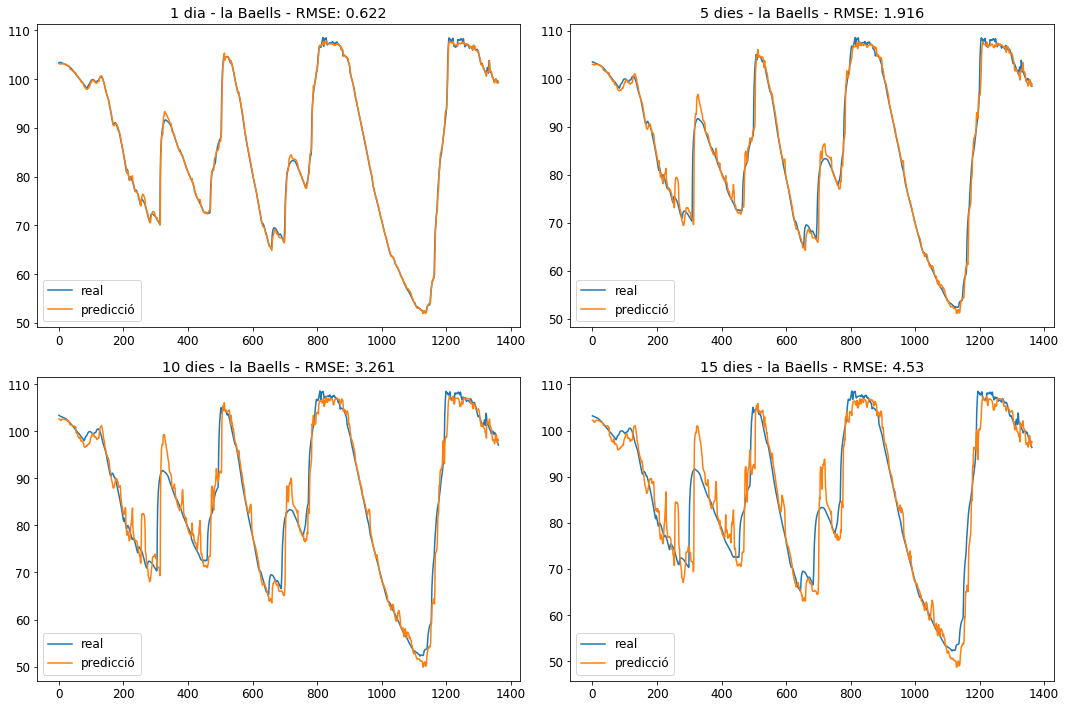

In [9]:
plt.rcParams.update({'font.size': 12})

plt.subplots_adjust(hspace=0.5)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# plot time signal:
axes[0, 0].set_title(title1)
axes[0, 0].plot(dies[0][0], label='real')
axes[0, 0].plot(dies[0][1], label='predicció')
axes[0, 0].legend(loc=3)

axes[0, 1].set_title(title5)
axes[0, 1].plot(dies[4][0], label='real')
axes[0, 1].plot(dies[4][1], label='predicció')
axes[0, 1].legend(loc=3)

axes[1, 0].set_title(title10)
axes[1, 0].plot(dies[9][0], label='real')
axes[1, 0].plot(dies[9][1], label='predicció')
axes[1, 0].legend(loc=3)

axes[1, 1].set_title(title15)
axes[1, 1].plot(dies[14][0], label='real')
axes[1, 1].plot(dies[14][1], label='predicció')
axes[1, 1].legend(loc=3)


fig.tight_layout()
plt.show()

In [3]:
resultat = []
n_steps_out = 15
propTrainTest = 0.8
n_steps_in = np.arange(1,25,1)

for entrades in n_steps_in:
    train_X, test_X, train_Y, test_Y = train_test(entrades, n_steps_out, propTrainTest, dataset)
    if entrades <18:
        max_feat = entrades
    else:
        max_feat = 18
        
    regr_rf = RandomForestRegressor(n_estimators=271, max_depth=22, max_features=max_feat, 
                                    min_samples_split = 2, min_samples_leaf=9, random_state=2)

    regr_rf.fit(train_X, train_Y)
    testPredict = regr_rf.predict(test_X)
    # invertim prediccions per tenir-les en l'escala original
    testPredict = scaler.inverse_transform(testPredict)
    test_YR = scaler.inverse_transform(test_Y)

    RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)
    print(RMSE_TOT, entrades)
    resultat.append((entrades, RMSE_TOT))

3.5624002991923236 1
2.9742732670993615 2
2.8692058121912023 3
2.8701624009887734 4
2.8626183096595326 5
2.878886520421855 6
2.885634086179656 7
2.8762975444430503 8
2.8841558980162283 9
2.880612078790475 10
2.8932231232410777 11
2.9017993854500643 12
2.9224745547319504 13
2.9319080681545278 14
2.9374882537466416 15
2.934214151103369 16
2.9294479653713745 17
2.919882781704264 18
2.924768386298439 19
2.933792196325939 20
2.9719557906827205 21
2.9916318795227252 22
3.056126515622707 23
3.053208153698839 24


In [4]:
n_steps_in = 5
n_steps_out = 15
propTrainTest = 0.8
train_X, test_X, train_Y, test_Y = train_test(n_steps_in, n_steps_out, propTrainTest, dataset)

In [8]:
from scipy.stats import uniform
from scipy.stats import randint
arbres=[]
profunditat=[]
max_features=[]
min_samples_split = []
min_samples_leaf = []
for i in range(500):
    arbres.append((randint.rvs(5, 500)))
    profunditat.append((randint.rvs(1, 121)))
    max_features.append((randint.rvs(1, 6)))
    min_samples_split.append((randint.rvs(2, 50)))
    min_samples_leaf.append((randint.rvs(1, 45)))

In [9]:
#Simulació RandomizedSearchCV per SVM
resultat=[]

for arbre, profund, max_f, mss, msl in zip(arbres, profunditat, max_features, min_samples_split, min_samples_leaf):
    regr_rf = RandomForestRegressor(n_estimators=arbre, max_depth=profund, max_features=max_f, 
                                    min_samples_split = mss, min_samples_leaf=msl, random_state=2)
    regr_rf.fit(train_X, train_Y)
    testPredict = regr_rf.predict(test_X)
    # invertim prediccions per tenir-les en l'escala original
    testPredict = scaler.inverse_transform(testPredict)
    test_YR = scaler.inverse_transform(test_Y)

    RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)
    print(RMSE_TOT,arbre, profund, max_f, mss, msl)
    resultat.append((arbre, profund, max_f, mss, msl, RMSE_days,RMSE_TOT))

2.929260139189499 63 115 4 38 21
2.984682554822201 107 38 5 6 28
2.9940634185985013 9 60 5 46 5
2.9241090100672396 440 118 4 45 9
3.829669569453739 127 4 2 38 43
3.136887765741265 87 10 3 2 32
3.376118186228972 196 98 2 16 42
3.1437996632869787 202 13 3 30 33
3.0405274878551367 202 37 5 30 34
2.9227068151249056 100 114 3 5 17
3.1440719160761983 372 22 2 30 26
2.950838101570316 72 105 4 4 1
3.195673530384545 341 92 1 38 18
3.2631432623762033 472 7 2 10 32
2.921745558652754 326 76 4 35 21
3.1014454492796917 220 100 3 5 30
3.5859883451243233 179 57 1 11 42
2.9032685977046846 189 86 4 40 11
3.0641250770947552 59 112 4 12 32
3.2482323914328397 391 5 5 47 25
2.902729197672152 286 60 4 35 20
3.0867810072598707 290 82 1 45 2
2.8859784635826653 363 13 3 18 11
2.8690294262225557 249 66 5 30 19
3.178270863587342 437 68 4 25 42
3.1350696378405347 49 49 2 39 25
2.8645818294757404 437 112 5 3 8
3.172745411815654 280 28 2 11 28
3.0894412986533797 472 9 1 16 10
2.897309599408902 147 56 4 29 19
3.11351

3.094670046241678 84 118 5 25 38
3.342281543250048 54 7 1 14 17
2.939178555101213 298 40 3 41 2
3.1108596542415183 89 113 3 26 31
2.9674634187910374 261 20 2 34 14
3.6054975055106326 485 4 5 37 11
3.167054027986683 447 62 2 24 28
3.121585600644434 273 41 2 49 25
2.971766994136506 266 36 2 43 4
3.2291200689599515 38 100 4 25 43
2.895699910583789 329 115 4 5 19
3.178004027612346 381 59 4 22 42
2.9908995705196033 284 102 2 9 17
2.879414741395116 383 57 5 32 8
2.9732016022195507 111 104 2 14 16
3.2696284199708026 73 43 3 3 41
2.855794212400617 193 68 5 24 16
3.1371217098157236 54 105 1 22 15
3.0788986121689716 281 62 1 38 7
2.878314059644251 470 91 3 5 12
3.2136053639703452 85 84 1 37 18
2.871778524531595 74 44 4 29 15
3.424212805752449 61 5 4 36 44
2.9765152240792006 463 85 3 13 22
3.185649925215998 390 78 4 21 43
3.158338921907387 275 97 2 47 27
3.259662103171826 286 23 2 11 33
2.963104907493991 444 13 1 12 4
3.1231801971941326 34 14 2 27 24
3.389444478278915 296 55 1 4 28
2.857207753910

3.070204608880935 80 117 3 21 28
3.4390934746689608 28 104 2 22 44
3.092135040369522 92 118 3 6 29


In [11]:
varlist = []
for i in range(len(arbres)):
    varlist.append(resultat[i])
    
resultFinal = pd.DataFrame(varlist)
resultFinal.columns=['n_estimators','max_depth',  'max_feautres','min_samples_split','min_samples_leaf','RMSE_dies', 'RMSE_total' ]
resultFinal = resultFinal.sort_values(by='RMSE_total', ascending=True)
resultFinal = resultFinal.reset_index(drop=True)

resultFinal[0:15]

,n_estimators,max_depth,max_feautres,min_samples_split,min_samples_leaf,RMSE_dies,RMSE_total
0,120,15,5,26,14,"[0.5724874186615289, 0.9357064527102341, 1.273...",2.851434
1,381,46,5,5,16,"[0.5753012102294991, 0.9388929427586514, 1.276...",2.851897
2,175,68,5,10,15,"[0.5717894673735501, 0.9336199788247388, 1.270...",2.853094
3,293,74,5,5,12,"[0.5536419751485019, 0.916735511336984, 1.2572...",2.853495
4,193,68,5,24,16,"[0.5756985917988704, 0.9386857498896963, 1.275...",2.855794
5,429,102,5,36,18,"[0.5888828719953157, 0.9520674419380692, 1.287...",2.856657
6,248,95,5,29,17,"[0.581719885071158, 0.9446286573508524, 1.2810...",2.857208
7,413,84,5,8,9,"[0.5338117340296198, 0.9000327412841925, 1.243...",2.858987
8,437,112,5,3,8,"[0.5266565119521179, 0.8946459890909239, 1.239...",2.864582
9,359,89,5,27,19,"[0.5951233064462346, 0.9590823305311056, 1.294...",2.866869


In [5]:
# Create a random dataset
regr_rf = RandomForestRegressor(n_estimators=120, max_depth=15, max_features=5, 
                                    min_samples_split = 26, min_samples_leaf=14, random_state=2)
    
regr_rf.fit(train_X, train_Y)
testPredict = regr_rf.predict(test_X)
# invertim prediccions per tenir-les en l'escala original
testPredict = scaler.inverse_transform(testPredict)
test_YR = scaler.inverse_transform(test_Y)

RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)

In [6]:
from tabulate import tabulate
headers=[]
for i in range(len(RMSE_days)):
    headers.append('dia '+str(i+1))

headers.append('Total')
v = RMSE_days
ultim = v.append(RMSE_TOT)
table1 = tabulate([RMSE_days[0:5]], headers[0:5], tablefmt="fancy_grid")
table2 = tabulate([RMSE_days[5:10]], headers[5:10], tablefmt="fancy_grid")
table3 = tabulate([RMSE_days[10:16]], headers[10:16], tablefmt="fancy_grid")
#output
print(table1)
print(table2)
print(table3)

╒══════════╤══════════╤═════════╤═════════╤═════════╕
│    dia 1 │    dia 2 │   dia 3 │   dia 4 │   dia 5 │
╞══════════╪══════════╪═════════╪═════════╪═════════╡
│ 0.572487 │ 0.935706 │ 1.27382 │ 1.58823 │  1.8812 │
╘══════════╧══════════╧═════════╧═════════╧═════════╛
╒═════════╤═════════╤═════════╤═════════╤══════════╕
│   dia 6 │   dia 7 │   dia 8 │   dia 9 │   dia 10 │
╞═════════╪═════════╪═════════╪═════════╪══════════╡
│ 2.15995 │ 2.42389 │ 2.68323 │ 2.94014 │  3.19268 │
╘═════════╧═════════╧═════════╧═════════╧══════════╛
╒══════════╤══════════╤══════════╤══════════╤══════════╤═════════╕
│   dia 11 │   dia 12 │   dia 13 │   dia 14 │   dia 15 │   Total │
╞══════════╪══════════╪══════════╪══════════╪══════════╪═════════╡
│  3.43655 │  3.67138 │  3.89862 │  4.12667 │   4.3563 │ 2.85143 │
╘══════════╧══════════╧══════════╧══════════╧══════════╧═════════╛


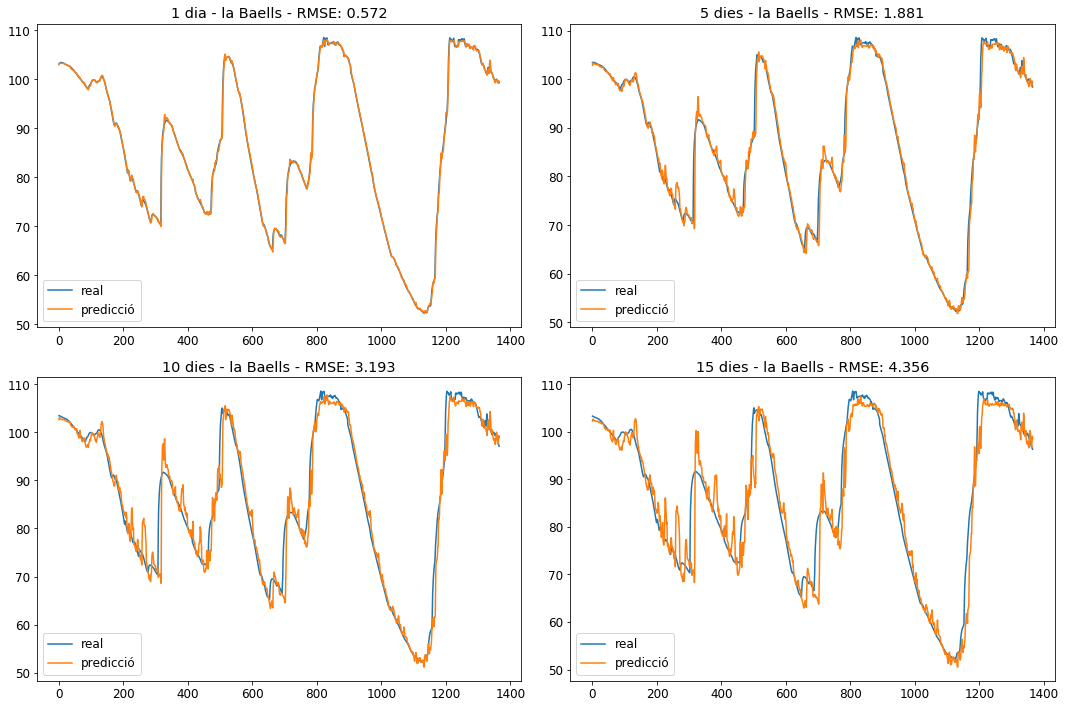

In [7]:
dies = list()
    # calculem RMSE per cada dia
    
for i in range(test_YR.shape[1]):
    # calculem MSE
    dies.append((test_YR[:, i], testPredict[:, i]))

%matplotlib inline
plt.rcParams["figure.figsize"] = [15,10]
title1 = '1 dia - la Baells - RMSE: '+str(round(RMSE_days[0],3))
title5 = '5 dies - la Baells - RMSE: '+str(round(RMSE_days[4],3))
title10 = '10 dies - la Baells - RMSE: '+str(round(RMSE_days[9],3))
title15 = '15 dies - la Baells - RMSE: '+str(round(RMSE_days[14],3))

plt.rcParams.update({'font.size': 12})

plt.subplots_adjust(hspace=0.5)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# plot time signal:
axes[0, 0].set_title(title1)
axes[0, 0].plot(dies[0][0], label='real')
axes[0, 0].plot(dies[0][1], label='predicció')
axes[0, 0].legend(loc=3)

axes[0, 1].set_title(title5)
axes[0, 1].plot(dies[4][0], label='real')
axes[0, 1].plot(dies[4][1], label='predicció')
axes[0, 1].legend(loc=3)

axes[1, 0].set_title(title10)
axes[1, 0].plot(dies[9][0], label='real')
axes[1, 0].plot(dies[9][1], label='predicció')
axes[1, 0].legend(loc=3)

axes[1, 1].set_title(title15)
axes[1, 1].plot(dies[14][0], label='real')
axes[1, 1].plot(dies[14][1], label='predicció')
axes[1, 1].legend(loc=3)


fig.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
def evaluate_forecasts_rquad(actual, predicted):
    scores = list()
    # calculem RMSE per cada dia
    for i in range(actual.shape[1]):
        # calculem MSE
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        r_quad = r2_score(actual[:, i], predicted[:, i])
        mae = mean_absolute_error(actual[:, i], predicted[:, i])
        # calculem RMSE
        rmse = sqrt(mse)
        # store
        scores.append((rmse,r_quad,mae,mse))
    # calcul global de RMSE
    s = 0
    r = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

In [9]:
RMSE_TOT, RMSE_days = evaluate_forecasts_rquad(test_YR,testPredict)
global_y = test_YR.reshape((test_YR.shape[0]*test_YR.shape[1], 1))
global_pred = testPredict.reshape((testPredict.shape[0]*testPredict.shape[1], 1))
r_quad = r2_score(global_y, global_pred)
rmse = sqrt(mean_squared_error(global_y, global_pred))
mse = mean_squared_error(global_y, global_pred)
mae = mean_absolute_error(global_y, global_pred)

res_globals=[rmse, r_quad, mae, mse]

resultsDF =  pd.DataFrame(RMSE_days)
resultsDF = resultsDF.T
resultsDF['Global'] = res_globals
resultsDF.columns=['dia 1','dia 2','dia 3','dia 4','dia 5','dia 6','dia 7','dia 8','dia 9','dia 10','dia 11','dia 12','dia 13','dia 14','dia 15', 'global']
resultsDF.rename(index={0:'RMSE',1:'R2',2:'MAE', 3:'MSE'}, inplace=True)
resultsDF = resultsDF.round(4)
display(resultsDF)

,dia 1,dia 2,dia 3,dia 4,dia 5,dia 6,dia 7,dia 8,dia 9,dia 10,dia 11,dia 12,dia 13,dia 14,dia 15,global
RMSE,0.5725,0.9357,1.2738,1.5882,1.8812,2.1600,2.4239,2.6832,2.9401,3.1927,3.4365,3.6714,3.8986,4.1267,4.3563,2.8514
R2,0.9987,0.9965,0.9936,0.9900,0.9860,0.9815,0.9767,0.9714,0.9656,0.9595,0.9530,0.9463,0.9395,0.9321,0.9243,0.9677
MAE,0.2885,0.4516,0.6189,0.7883,0.9545,1.1229,1.2900,1.4681,1.6519,1.8409,2.0169,2.1930,2.3705,2.5484,2.7258,1.4887
MSE,0.3277,0.8755,1.6226,2.5225,3.5389,4.6654,5.8752,7.1997,8.6444,10.1932,11.8099,13.4790,15.1992,17.0294,18.9773,8.1307


In [10]:
RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)
v = RMSE_days
ultim = v.append(RMSE_TOT)

dades_diesDF=pd.DataFrame(v)
dades_diesDF=dades_diesDF.round(3)
dades_diesDF=dades_diesDF.T
dades_diesDF.columns=['dia 1','dia 2','dia 3','dia 4','dia 5','dia 6','dia 7','dia 8','dia 9','dia 10','dia 11','dia 12','dia 13','dia 14','dia 15', 'global']
dades_diesDF.rename(index={0:'RMSE'}, inplace=True)

display(dades_diesDF)

,dia 1,dia 2,dia 3,dia 4,dia 5,dia 6,dia 7,dia 8,dia 9,dia 10,dia 11,dia 12,dia 13,dia 14,dia 15,global
RMSE,0.572,0.936,1.274,1.588,1.881,2.16,2.424,2.683,2.94,3.193,3.437,3.671,3.899,4.127,4.356,2.851


In [12]:
resultsDF.to_csv('rf-uni-baells.csv', sep=',', encoding='utf-8')